Chào các bạn hôm nay chúng ta sẽ nói về linear models, tức là shallow learning. 

Nếu theo dõi các bài viết của mình thường xuyên, chắc các bạn sẽ nghe chán chê câu: model machine learning có thể được xem như một hàm số $f_{\theta}$ với tham số $\theta$. Hôm nay mình lại nhắc lại, không phải vì già lẩm cẩm, mà với dụng ý tốt. Bắt đầu từ bài này, chúng ta sẽ mổ xẻ xem bên trong hàm $f_{\theta}$ này thực chất là cái gì?

Thỉnh thoảng, để gọn nhẹ, mình sẽ bỏ $\theta$ đi trong kí hiệu nhé.

### Linear function

Model $f$ được gọi là linear nếu $f$ là một linear function (hàm tuyến tính). Linear function là gì? Các hàm số tuyến tính $f(x) = ax + b$ là một ví dụ của linear function. Tuy nhiên, linear function tổng quát hơn thế.

Ở đây, mình không đưa ra định nghĩa chính xác về linear function mà đưa ra một định nghĩa để nhận diện linear function trong khuôn khổ nghiên cứu machine learning. 

Tổng quát linear function có dạng như sau:

$$linear(x; W, b) = Wx + b$$ với $x$, $b$ là vector, $W$ là một matrix (ma trận). Trong trường hợp này, $x$ là variable (biến số) của hàm, còn $W$ và $b$ là parameter (tham số).

Cách viết $Wx$ tức là phép nhân matrix $W$ với vector $x$. Phép nhân matrix với vector là một trường hợp đặc biệt của phép nhân hai matrix. Các bạn không biết hoặc quên về phép nhân matrix thì không phải quá lo lắng. Ở đây, các bạn chỉ cần hiểu:
1. Matrix là một bảng số hình chữ nhật có $m$ dòng và $n$ cột. 
2. Vector là một matrix chỉ có 1 cột.  

Nếu matrix có $m$ dòng và $n$ cột, ta nói là matrix có size là $(m, n)$. Nếu vector có shape là $(n, 1)$, ta cũng gọi đây là vector n chiều. 

Mình sẽ không nói kỹ phép nhân matrix được thực hiện cụ thể ra sao. Mình muốn chú ý đến size của các phần tử trong phép nhân ma trận. 

Không phải hai matrix $A$ và $B$ nào cũng nhân được với nhau. Để phép nhân $AB$ được hợp lệ thì số cột của $A$ phải bằng số hàng của $B$. Nói cách khác, nếu $A$ có size là $(m, n)$, $B$ phải có size là $(n, k)$. Kết quả của phép nhân $C = AB$ là một matrix có size $(m, k)$. 

Cũng không phải hai vector nào cũng cộng được cho nhau. Hai vector cộng được cho nhau nếu chúng cùng size. 

**Tóm lại, nếu $x$ là vector $n$ chiều, muốn linear function $linear(x) = Wx + b$ hợp lệ**:

**1. $W$ có size $(m, n)$.**

**2. $b$ có size $(n, 1)$.**

### Demo

Sau đây mình sẽ demo phép nhân ma trận trong PyTorch:

In [73]:
import torch

def create_matrix(m, n=1):
    res = torch.rand(m, n)
    print res.size()
    return res

# Tạo ra vector có size (5, 1)
x = create_matrix(5)


torch.Size([5, 1])


In [74]:
# Tạo matrix U có size (5, 3)
U = create_matrix(5, 3)

torch.Size([5, 3])


In [75]:
# Tạo matrix W có size (3, 5)
W = create_matrix(3, 5)

torch.Size([3, 5])


In [76]:
# Thử phép nhân không hợp lệ Ux. 
print U.mm(x)

RuntimeError: size mismatch, m1: [5 x 3], m2: [5 x 1] at /py/conda-bld/pytorch_1490893784944/work/torch/lib/TH/generic/THTensorMath.c:1229

In [77]:
# Thử phép nhân hợp lệ W * x, kết quả là một vector có size (3,1) (3 là số hàng của W, 1 là số cột của x)
print W.mm(x)


 0.9410
 1.0138
 0.8932
[torch.FloatTensor of size 3x1]



Khi $W$ là một ma trận vuông ($m = n$) thì bạn có thể dùng nó để xoay, tịnh tiến, chiếu, lấy đối xứng,... của một vector. 


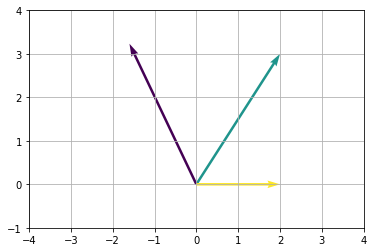

In [145]:
import math
import numpy as np
import matplotlib.pyplot as plt

def plot_vector(soa):
    X, Y, U, V = soa
    plt.figure()
    ax = plt.gca()
    ax.quiver(X,Y, U,V, np.arctan2(U, V), angles='xy', scale_units='xy', scale=1)
    plt.xticks(range(-4,5))
    plt.yticks(range(-1,5))
    plt.grid()
    plt.draw()
    plt.show()
    
def rotate(x, degree):
    r = math.radians(degree)
    W = torch.Tensor([[math.cos(r), -math.sin(r)], [math.sin(r), math.cos(r)]])
    return W.mm(x)

def projection(x):
    W = torch.Tensor([[1, 0], [0, 0]])
    return W.mm(x)

def tolist(x):
    return x.squeeze(1).tolist()

# Tạo vector (2, 3)
x = torch.Tensor([[2], [3]])
# Xoay ngược kim đồng hồ 60 độ.
y = rotate(x, 60)
# Project lên trục x.
z = projection(x)

all_vecs = zip(*[tolist(x), tolist(y), tolist(z)])
all_vecs = [(0, 0, 0), (0, 0, 0)] + all_vecs
plot_vector(all_vecs)



### Linear model

Trường hợp thú vị hơn là khi $W$ không phải ma trận vuông ($m \neq n$). Khi đó, input của $linear(x)$ là vector $x$ có $n$ và output là một vector có $m$ chiều. Vậy công dụng của linear function là chuyển một vector từ $n$ chiều sang $m$ chiều. Công dụng này rất hữu ích cho ML nói chung và đặc biệt là deep learning. 

Tại sao bạn phải đổi chiều của một vector? Đầu tiên ta nói về linear models trước rồi sẽ nói về deep models sau. 

Giả sử bạn muốn dự đoán xem hôm nay trời có mưa hay không bằng một model $linear(x)$. Vector n chiều $x$ của bạn sẽ là dữ liệu vào, biểu diễn $n$ **feature**, là các thông số cần thiết để đưa ra dự đoán (ví dụ nhiệt độ, độ ẩm, thể tích mây, lượng mưa trong tháng vừa rồi, ...). 

Bạn quy ước rằng dự đoán về việc trời có mưa hay không được thể hiện bằng một vector 2 chiều. Chiều thứ nhất là độ chắc chắn về trời mưa, chiều thứ hai là độ chắc chắn về trời không mưa. Bạn sẽ dự đoán theo chiều nào có giá trị lớn hơn. Ví dụ, nếu $(12, 3)$ tức là trời mưa, còn $(-5. 0)$ tức là trời không mưa. 

Để tạo ra vector 2 chiều này, bạn cần một linear function đưa vector $x$ có n chiều thành vector 2 chiều. Vì thế bạn sử dụng một model $linear(x) = Wx + b$ với W là matrix $(2, n)$ và b là vector $(2, 1)$. 